#Directory, Libraries and Data

In [35]:
%cd /content/drive/MyDrive/Business Analyst course/Statistics and Descriptive Analytics/Logistic Regression

/content/drive/MyDrive/Business Analyst course/Statistics and Descriptive Analytics/Logistic Regression


In [36]:
#Libraries
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import numpy as np

In [37]:
#Load the data
df = pd.read_csv("spam.csv")
df.head()

,crl.tot,dollar,bang,money,n000,make,yesno
0,278,0.000,0.778,0.00,0.00,0.00,y
1,1028,0.180,0.372,0.43,0.43,0.21,y
2,2259,0.184,0.276,0.06,1.16,0.06,y
3,191,0.000,0.137,0.00,0.00,0.00,y
4,191,0.000,0.135,0.00,0.00,0.00,y


#Data Analysis

In [38]:
#summary statistics
df.describe()

,crl.tot,dollar,bang,money,n000,make
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,283.289285,0.075811,0.269071,0.094269,0.101645,0.104553
std,606.347851,0.245882,0.815672,0.442636,0.350286,0.305358
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,95.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,266.000000,0.052000,0.315000,0.000000,0.000000,0.000000
max,15841.000000,6.003000,32.478000,12.500000,5.450000,4.540000


array([[<Axes: title={'center': 'crl.tot'}>,
        <Axes: title={'center': 'dollar'}>,
        <Axes: title={'center': 'bang'}>],
       [<Axes: title={'center': 'money'}>,
        <Axes: title={'center': 'n000'}>,
        <Axes: title={'center': 'make'}>],
       [<Axes: title={'center': 'yesno'}>, <Axes: >, <Axes: >]],
      dtype=object)

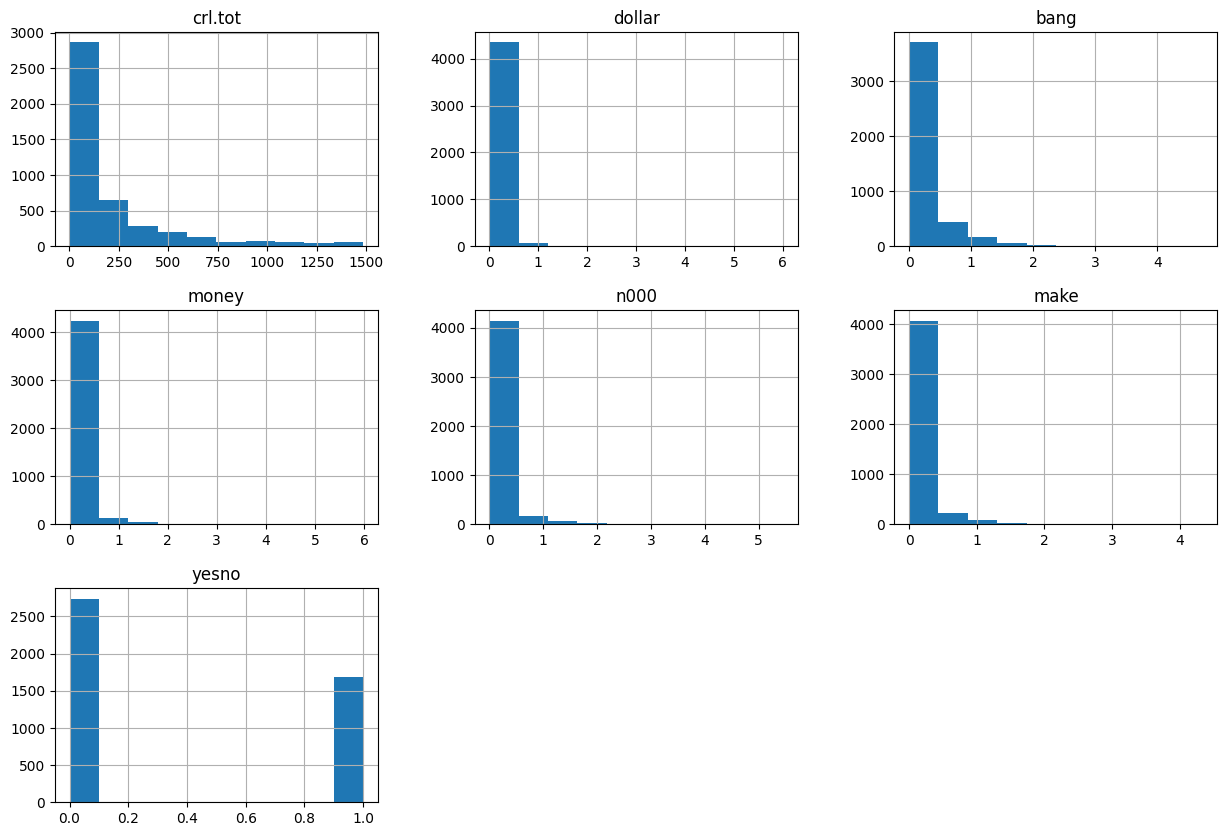

In [47]:
#histograms
df.hist(figsize= (15,10))

In [40]:
#removing outliers
print(len(df))
df = df[df["crl.tot"] < 1500]
df = df[df["bang"] < 5]
df = df[df["money"] < 6]
print(len(df))

4601
4432


<ipython-input-41-a3443074e978>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),


<Axes: >

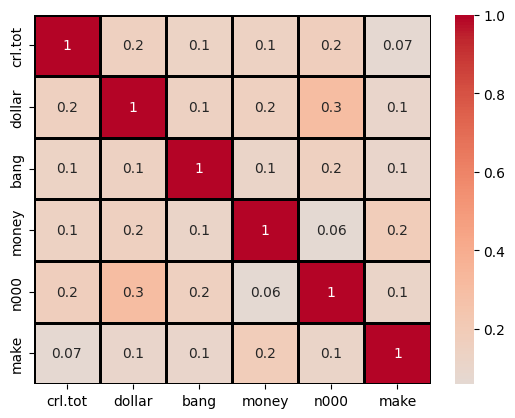

In [41]:
#Correlation Matrix
sns.heatmap(df.corr(),
            annot = True,
            fmt = '.1g',
            center = 0,
            cmap = 'coolwarm',
            linewidths = 1,
            linecolor = 'black')

#Logistic Regression preparation

In [42]:
df.head(0)

,crl.tot,dollar,bang,money,n000,make,yesno


In [43]:
#Prepare dependent variable
df["yesno"] = np.where(df["yesno"] == "y", 1, 0 )
df.head(1)

,crl.tot,dollar,bang,money,n000,make,yesno
0,278,0.0,0.778,0.0,0.0,0.0,1


In [44]:
#prepare the X and y
y = df.yesno
X = df.iloc[:,:-1]
X = sm.add_constant(X)
X.head(2)

,const,crl.tot,dollar,bang,money,n000,make
0,1.0,278,0.00,0.778,0.00,0.00,0.00
1,1.0,1028,0.18,0.372,0.43,0.43,0.21


In [45]:
#Training and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2,
                                                    random_state = 1502)

#Logistic Regression

In [46]:
#Logistic Regression
model = sm.Logit(y_train, X_train).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.386779
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                  yesno   No. Observations:                 3545
Model:                          Logit   Df Residuals:                     3538
Method:                           MLE   Df Model:                            6
Date:                Thu, 28 Sep 2023   Pseudo R-squ.:                  0.4210
Time:                        12:14:28   Log-Likelihood:                -1371.1
converged:                       True   LL-Null:                       -2368.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.1801      0.074    -29.532      0.000      -2.325      -2.035
crl.tot        0.0017      0.

In [56]:
#Create the function
def logistic_reader(coefficient):
  probability = round((np.exp(coefficient) -1) * 100, 2)
  print(coefficient)
  if probability > 0:
    print("The likelihood increases by", probability, "%")
  elif probability == 0:
    print("No impact")
  else:
    print("The likelihood decreases by", probability ,"%")


In [59]:
#Apply the function
logistic_reader(6.58)

6.58
The likelihood increases by 71953.93 %


#Assess the model

In [62]:
#predictions
predictions = model.predict(X_test)
predictions = np.where(predictions > 0.5, 1, 0)
predictions[:5]

array([1, 0, 0, 0, 0])

In [63]:
#Check is dataset is balanced
y_test.mean()

0.35400225479143177

In [65]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, predictions))
tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()

[[524  49]
 [102 212]]


In [66]:
fp

49

In [71]:
#Accuracy
accuracy = (tp + tn) / (tp + tn + fp + fn)
print("Accuracy:", round(accuracy * 100, 1), "%")

#f1 Score
f1 = 2 * tp / (2 * tp + fn + fp)
print("F1 Score:", round(f1 * 100, 1), "%")

#Specificity
specificity = tn / (tn + fp)
print("Speficity:", round(specificity *100, 1), "%")

#Sensitivity
sensitivity = tp / (tp + fn)
print("Sensitivity:", round(sensitivity * 100, 1), "%")

Accuracy: 83.0 %
F1 Score: 73.7 %
Speficity: 91.4 %
Sensitivity: 67.5 %


In [73]:
#Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87       573
           1       0.81      0.68      0.74       314

    accuracy                           0.83       887
   macro avg       0.82      0.79      0.81       887
weighted avg       0.83      0.83      0.83       887

